In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()


In [2]:
N, er, ar = 35, 1.5, 20.0
filename = f'Galla/{N}_bots/sim_fp_results_er_{er}_NOPUSH.csv'
df = pd.read_csv(filename)
df = df.rename(columns={'lambda':'lamb'})

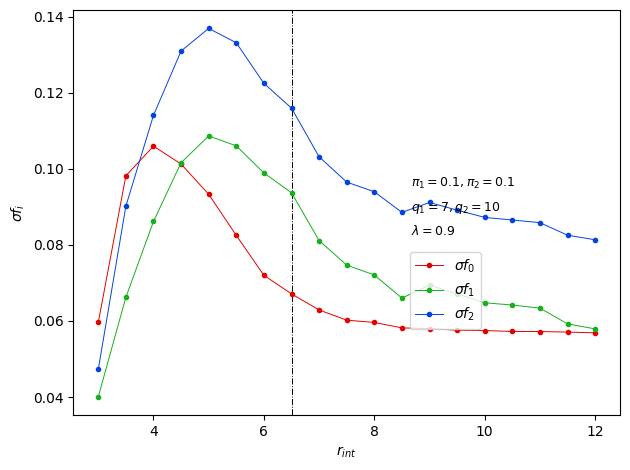

In [60]:
# experiment conditions:
pi1, pi2, q1, q2, l = 0.1, 0.1, 7, 10, 0.9
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
fig, ax = plt.subplots()
ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')
ax.plot(df_exp['interac_r'], df_exp['sdf0'], lw=0.7, marker='.', color='xkcd:red', label=r'$\sigma f_0$')
ax.plot(df_exp['interac_r'], df_exp['sdf1'], lw=0.7, marker='.', color='xkcd:green', label=r'$\sigma f_1$')
ax.plot(df_exp['interac_r'], df_exp['sdf2'], lw=0.7, marker='.', color='xkcd:blue', label=r'$\sigma f_2$')
ax.set(xlabel=r'$r_{int}$', ylabel=r'$\sigma f_i$')
fig.text(0.65, 0.6, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=9)
fig.text(0.65, 0.55, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.text(0.65, 0.5, fr'$\lambda = {l}$', fontsize=9)
fig.legend(loc=(0.65,0.3))
fig.tight_layout()
fig.savefig(f'fluctuations_fs_var_ir_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ar_{ar}_er_{er}.png')

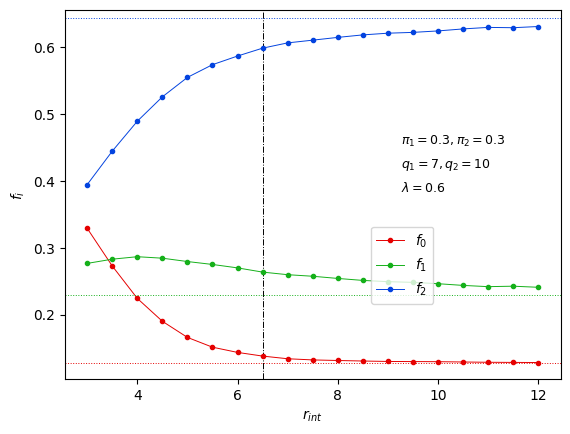

In [55]:
# experiment conditions:
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
fig, ax = plt.subplots()
ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')
ax.plot(df_exp['interac_r'], df_exp['f0'], lw=0.7, marker='.', color='xkcd:red', label=r'$f_0$')
ax.plot(df_exp['interac_r'], df_exp['f1'], lw=0.7, marker='.', color='xkcd:green', label=r'$f_1$')
ax.plot(df_exp['interac_r'], df_exp['f2'], lw=0.7, marker='.', color='xkcd:blue', label=r'$f_2$')
# get the mean field values:
call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} > sols.dat', shell=True)
with open('sols.dat', 'r') as file:
    sols = [float(f) for f in file.readline().split()]
ax.axhline(sols[0], color='xkcd:red', ls=':', lw=0.7)
ax.axhline(sols[1], color='xkcd:green', ls=':', lw=0.7)
ax.axhline(sols[2], color='xkcd:blue', ls=':', lw=0.7)
ax.set(xlabel=r'$r_{int}$', ylabel=r'$f_i$')
fig.text(0.65, 0.6, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=9)
fig.text(0.65, 0.55, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.text(0.65, 0.5, fr'$\lambda = {l}$', fontsize=9)
fig.legend(loc=(0.65,0.3))


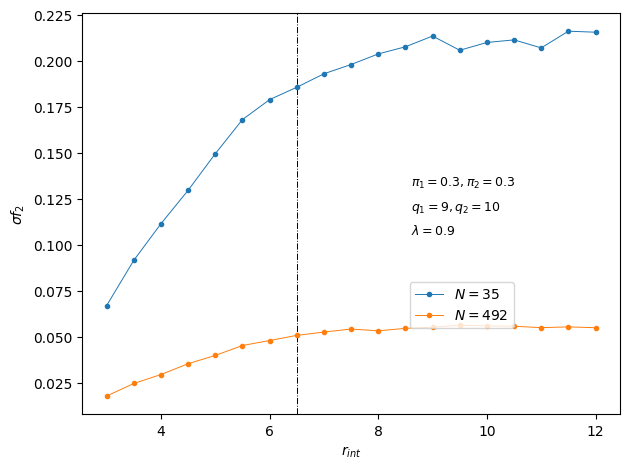

In [8]:
# changing the system size:
pi1, pi2, q1, q2, l = 0.3, 0.3, 9, 10, 0.9

fig, ax = plt.subplots()
ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')

N = 35
filename = f'Galla/{N}_bots/sim_fp_results_er_{er}_NOPUSH.csv'
df = pd.read_csv(filename)
df = df.rename(columns={'lambda':'lamb'})
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
ax.plot(df_exp['interac_r'], df_exp['sdf2'], lw=0.7, marker='.', label=rf'$N={N}$')

N = 492
filename = f'Galla/{N}_bots/sim_fp_results_er_{er}_NOPUSH.csv'
df = pd.read_csv(filename)
df = df.rename(columns={'lambda':'lamb'})
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
ax.plot(df_exp['interac_r'], df_exp['sdf2'], lw=0.7, marker='.', label=rf'$N={N}$')

ax.set(xlabel=r'$r_{int}$', ylabel=r'$\sigma f_2$')
fig.text(0.65, 0.6, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=9)
fig.text(0.65, 0.55, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.text(0.65, 0.5, fr'$\lambda = {l}$', fontsize=9)
fig.legend(loc=(0.65,0.3))
fig.tight_layout()
fig.savefig(f'fluctuations_f2_var_ir_many_N_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ar_{ar}_er_{er}.png')


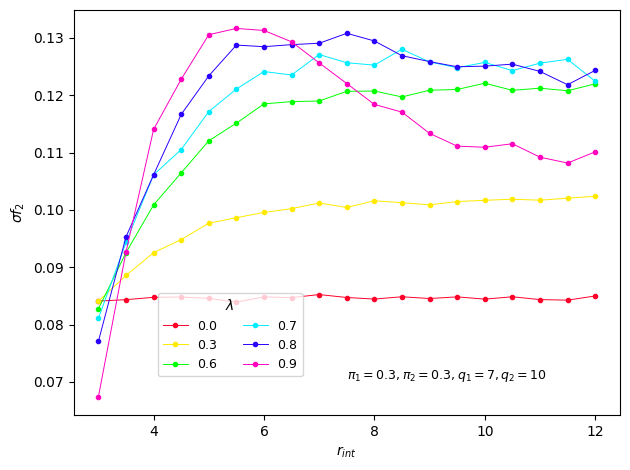

In [15]:
# F2 fluctuations for various lambda, other parameters constant:
pi1, pi2, q1, q2 = 0.3, 0.3, 7, 10

df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2')

ls = [0.0, 0.3, 0.6, 0.7, 0.8, 0.9]
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(ls)))

fig, ax = plt.subplots()
# ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')

for l,c in zip(ls,colors):
    df_exp_l = df_exp.query('lamb == @l')
    ax.plot(df_exp_l['interac_r'], df_exp_l['sdf2'], lw=0.7, marker='.', color=c, label=f'{l}')

ax.set(xlabel=r'$r_{int}$', ylabel=r'$\sigma f_2$')
fig.text(0.55, 0.2, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}, q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.legend(loc=(0.25,0.20), title='$\lambda$', fontsize=9, ncol=2)
fig.tight_layout()
fig.savefig(f'fluctuations_f2_var_ir_many_l_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_N_{N}_ar_{ar}_er_{er}.png')

In [16]:
# search nodes with degree = 0 in each config:
# at ri=3.0 we know each one is

if os.path.exists(extSSDpath):
    path = extSSDpath + f'/quenched_configs/{N}_bots/raw_data'
else:
    print('osti tu')

pushLabel = 'nopush'

n0_ir_avg, n0_ir_std = [35, ], [0, ] # add values correspondig to ri=3.0
for ir in np.linspace(3.5,12,18):
    filename = f'/degrees_N_{N}_ar_{ar}_er_{er}_ir_{ir}_{pushLabel}.parquet'
    degrees = pd.read_parquet(path + filename)
    n0_ir = []
    for i in range(0,len(degrees),N):
        degrees_i = degrees.iloc[i:i+N]
        n0 = len(degrees_i.query('degrees == 0'))
        n0_ir.append(n0)
    n0_ir_avg.append(np.average(n0_ir)), n0_ir_std.append(np.std(n0_ir))


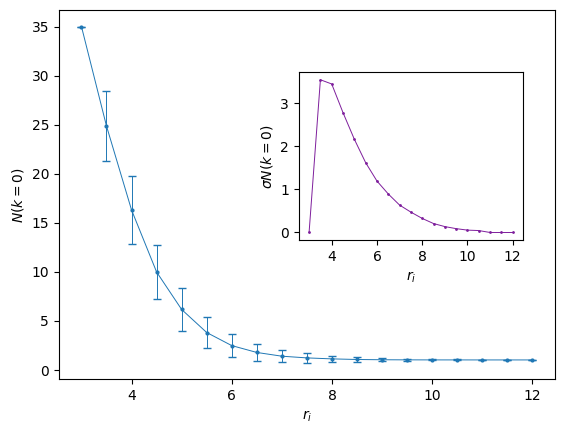

In [29]:
fig, ax = plt.subplots()
ax.set(xlabel=r'$r_i$', ylabel=r'$N(k = 0)$')
irs = np.linspace(3.0,12,19)
# ax.plot(irs, n0_ir_avg)
ax.errorbar(irs, n0_ir_avg, n0_ir_std, lw=0.7, elinewidth=0.7, capsize=3.0, marker='.', markersize=4.0)

left, bottom, width, height = [0.5, 0.4, 0.35, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(irs, n0_ir_std, lw=0.7, color='xkcd:purple', marker='.', markersize=2.0)
ax2.set(xlabel=r'$r_i$', ylabel=r'$\sigma N(k = 0)$')

# fig.tight_layout()
fig.savefig(f'num_bots_degree_0_var_ir_N_{N}_ar_{ar}_er_{er}_{pushLabel}.png')